# Landscape Singlet Lens

Let's design a simple landscape singlet lens. This means two things:

* A single lens (two refractive surfaces) made of one material: `tlm.AsymmetricLens`
* A light source at infinity: `tlm.ObjectAtInfinity`

We will also add an Aperture to model the lens entrance pupil. In the 'rear' case, the light source element acts as the aperture. In the 'front' case, an aperture is added behind the lens.

## Landscape rear configuration

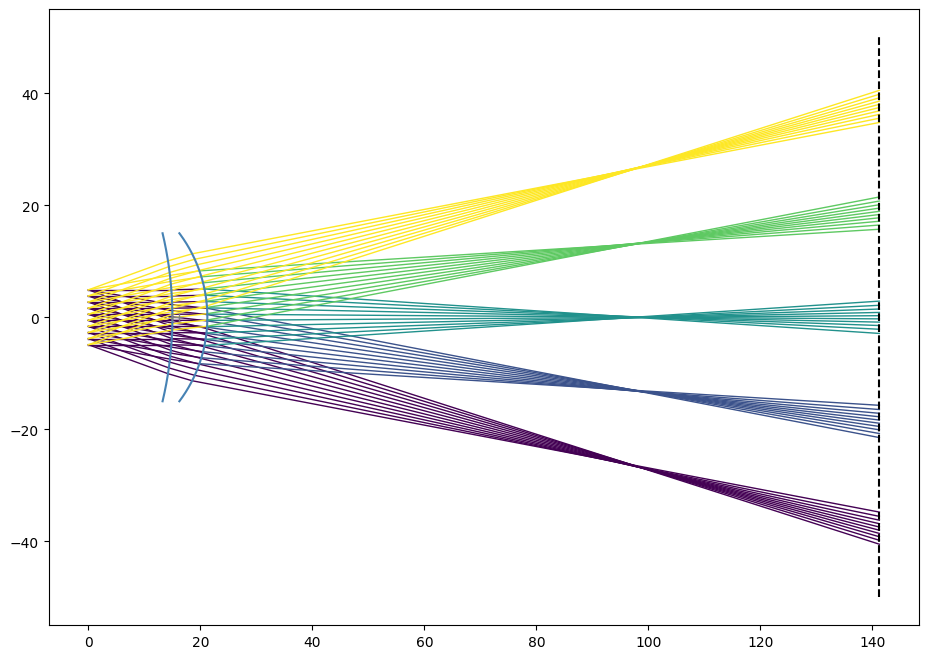

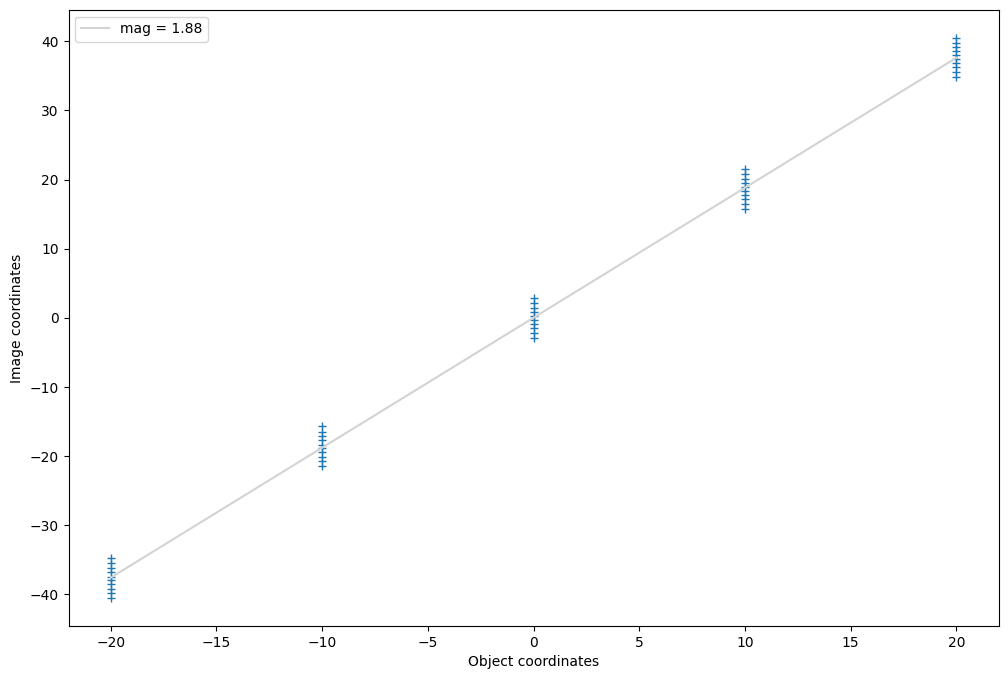

[  0/100] L= 319.078 | grad norm= 98055.125
[  5/100] L= 252.087 | grad norm= 86893.703125
[ 10/100] L= 193.941 | grad norm= 75948.8203125


[ 15/100] L= 144.887 | grad norm= 65354.53515625
[ 20/100] L= 104.813 | grad norm= 55250.16015625
[ 25/100] L= 73.242 | grad norm= 45772.4921875


[ 30/100] L= 49.366 | grad norm= 37047.453125
[ 35/100] L= 32.128 | grad norm= 29181.390625
[ 40/100] L= 20.326 | grad norm= 22253.58203125


[ 45/100] L= 12.729 | grad norm= 16309.67578125
[ 50/100] L=  8.186 | grad norm= 11358.2421875
[ 55/100] L=  5.707 | grad norm= 7370.28173828125


[ 60/100] L=  4.512 | grad norm= 4282.22021484375
[ 65/100] L=  4.035 | grad norm= 2002.529541015625
[ 70/100] L=  3.907 | grad norm= 422.79791259765625


[ 75/100] L=  3.912 | grad norm= 594.9176025390625
[ 80/100] L=  3.943 | grad norm= 1150.2088623046875
[ 85/100] L=  3.961 | grad norm= 1371.24755859375


[ 90/100] L=  3.960 | grad norm= 1361.0111083984375
[ 95/100] L=  3.947 | grad norm= 1206.7115478515625


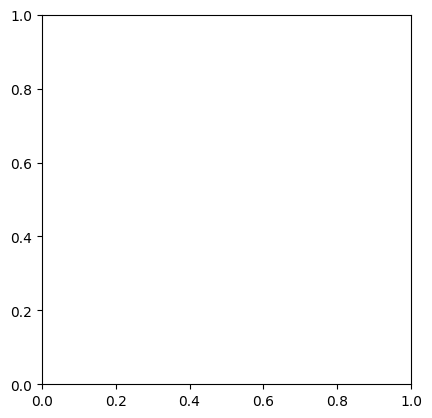

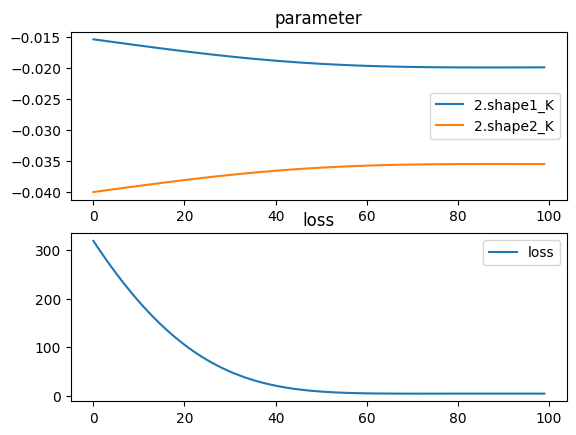

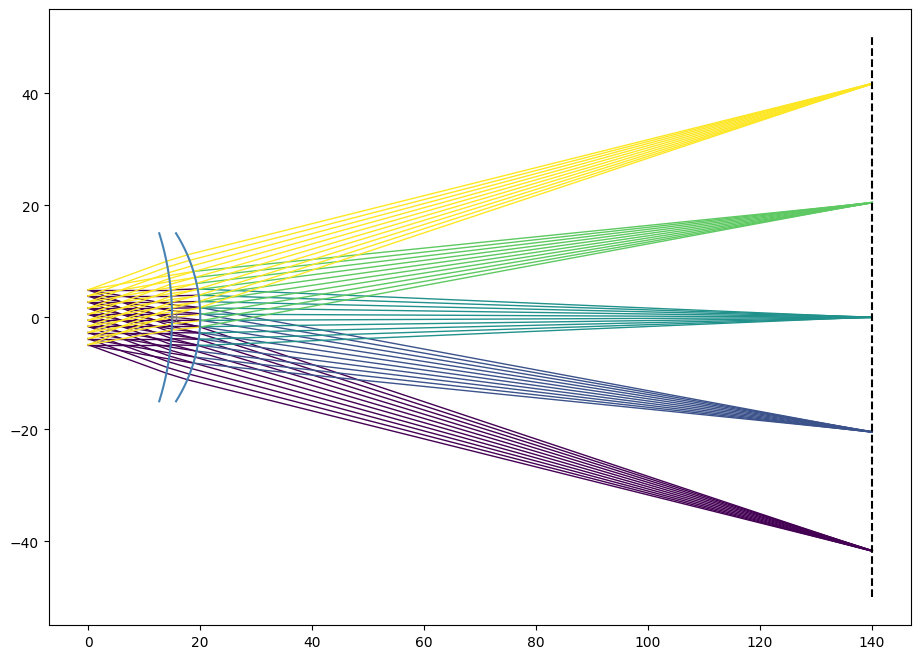

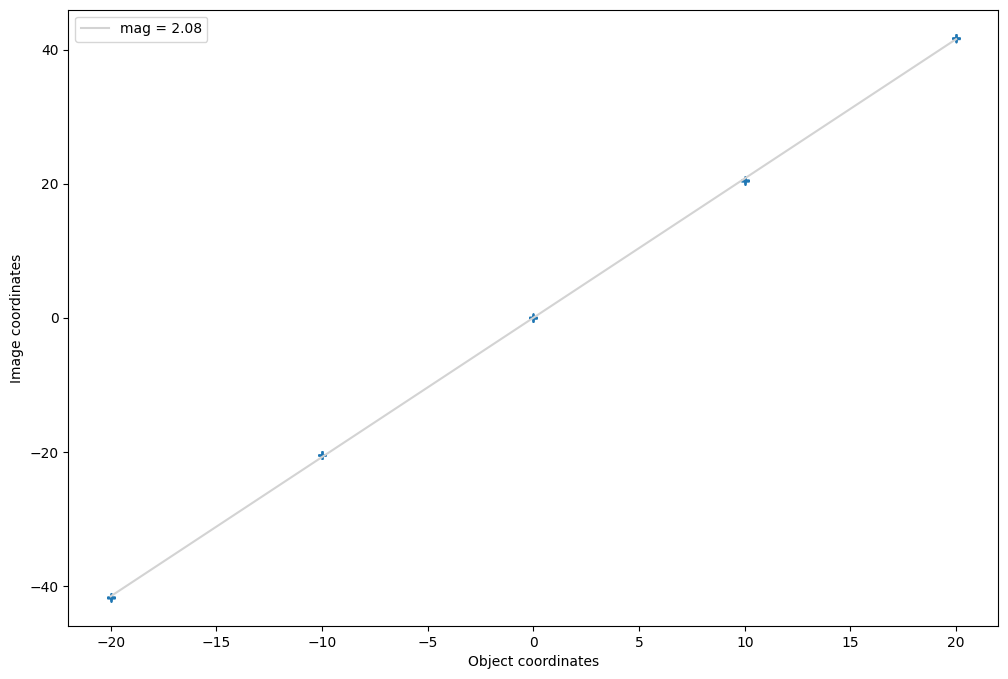

In [1]:
import torch
import torchlensmaker as tlm
import torch.optim as optim

# Setup two spherical surfaces with initial radiuses
shape1 = tlm.CircularArc(height=30, r=tlm.Parameter(torch.tensor(-65.)))
shape2 = tlm.CircularArc(height=30, r=tlm.Parameter(torch.tensor(-25.)))

# Build the optical sequence
optics = tlm.OpticalSequence(
    tlm.ObjectAtInfinity(beam_diameter=10, angular_size=40),
    tlm.Gap(15),
    tlm.AsymmetricLens(shape1, shape2, (1.0, 1.5), outer_thickness=3.),
    tlm.Gap(120),
    tlm.ImagePlane(height=100),
)

# Render the optical configuration with initial values
# Sample 10 rays per location, and 5 object locations: total = 50 rays
tlm.render_plt(optics, color_dim="object", sampling={"rays": 10, "object": 5})
tlm.plot_magnification(optics, sampling={"rays": 10, "object": 5})

# Find the best parameters for the shapes
tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-4),
    sampling = {"rays": 10, "object": 10},
    num_iter = 100,
)

# Render with final values
tlm.render_plt(optics, sampling={"rays": 10, "object": 5}, color_dim="object")
tlm.plot_magnification(optics, sampling={"rays": 10, "object": 5})

## Landscape front configuration

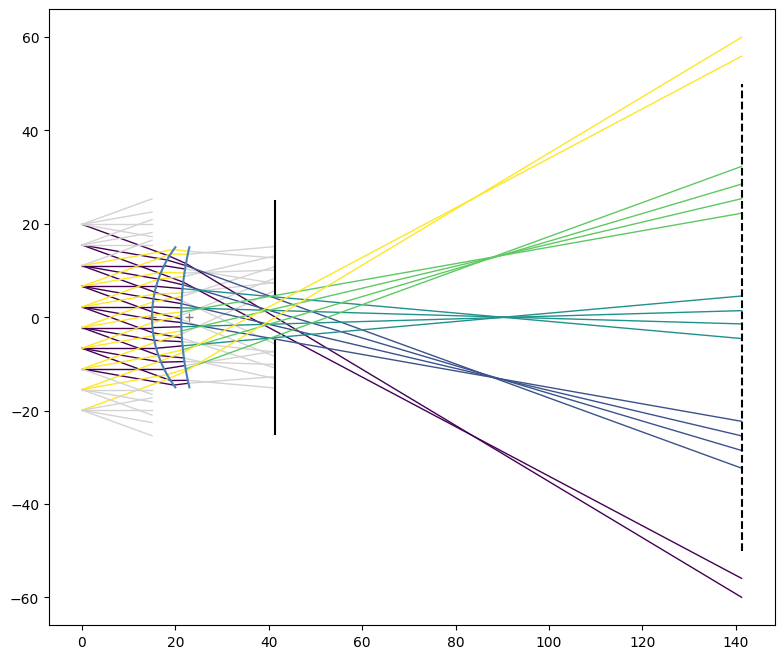

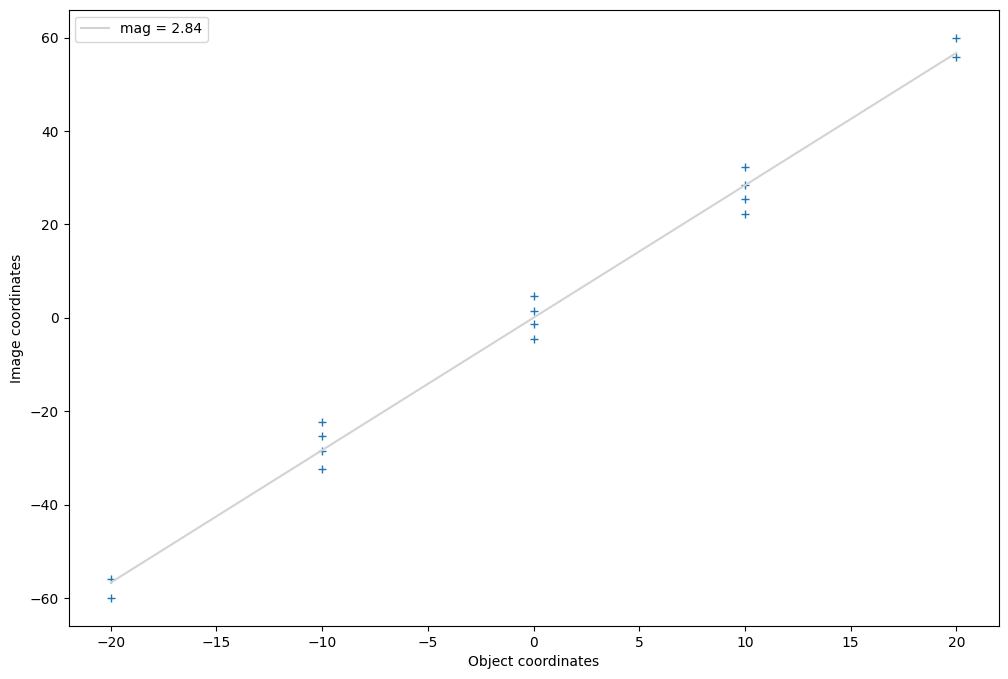

[  0/200] L= 206.215 | grad norm= 55560.96875
[ 10/200] L= 135.578 | grad norm= 43313.47265625


[ 20/200] L= 84.181 | grad norm= 32541.404296875
[ 30/200] L= 50.089 | grad norm= 23459.9375


[ 40/200] L= 33.665 | grad norm= 19179.388671875
[ 50/200] L= 19.937 | grad norm= 11548.228515625


[ 60/200] L= 14.040 | grad norm= 6254.75439453125
[ 70/200] L= 11.894 | grad norm= 3269.543701171875


[ 80/200] L= 11.233 | grad norm= 1445.0496826171875
[ 90/200] L= 11.083 | grad norm= 452.3117370605469


[100/200] L= 11.066 | grad norm= 170.85340881347656
[110/200] L= 11.067 | grad norm= 273.39105224609375


[120/200] L= 11.066 | grad norm= 275.9989318847656
[130/200] L= 11.062 | grad norm= 230.8311309814453


[140/200] L= 11.059 | grad norm= 188.88291931152344
[150/200] L= 11.057 | grad norm= 167.84632873535156


[160/200] L= 11.055 | grad norm= 161.56910705566406
[170/200] L= 11.053 | grad norm= 160.40850830078125


[180/200] L= 11.051 | grad norm= 160.1884765625
[190/200] L= 11.049 | grad norm= 160.12693786621094


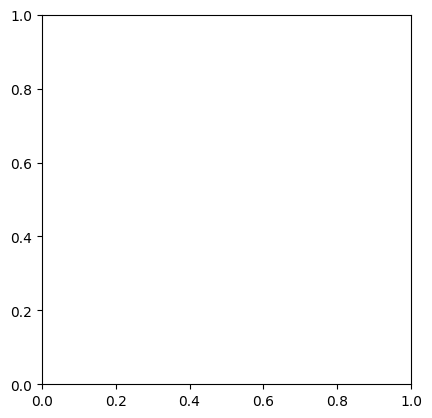

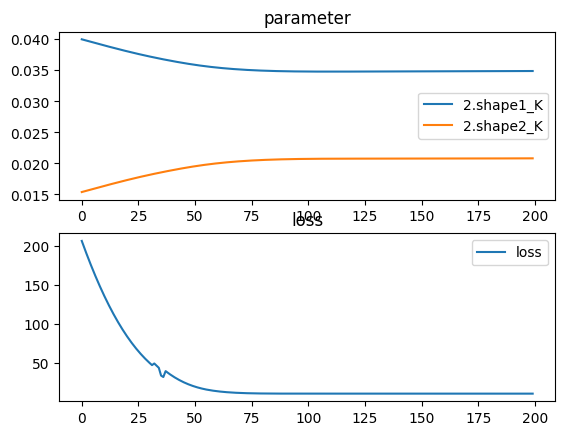

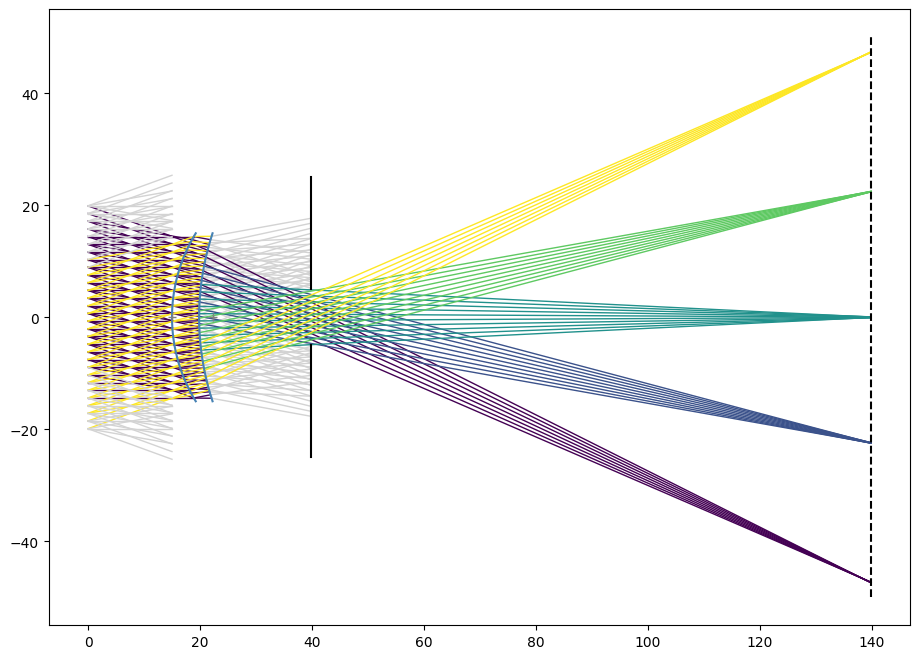

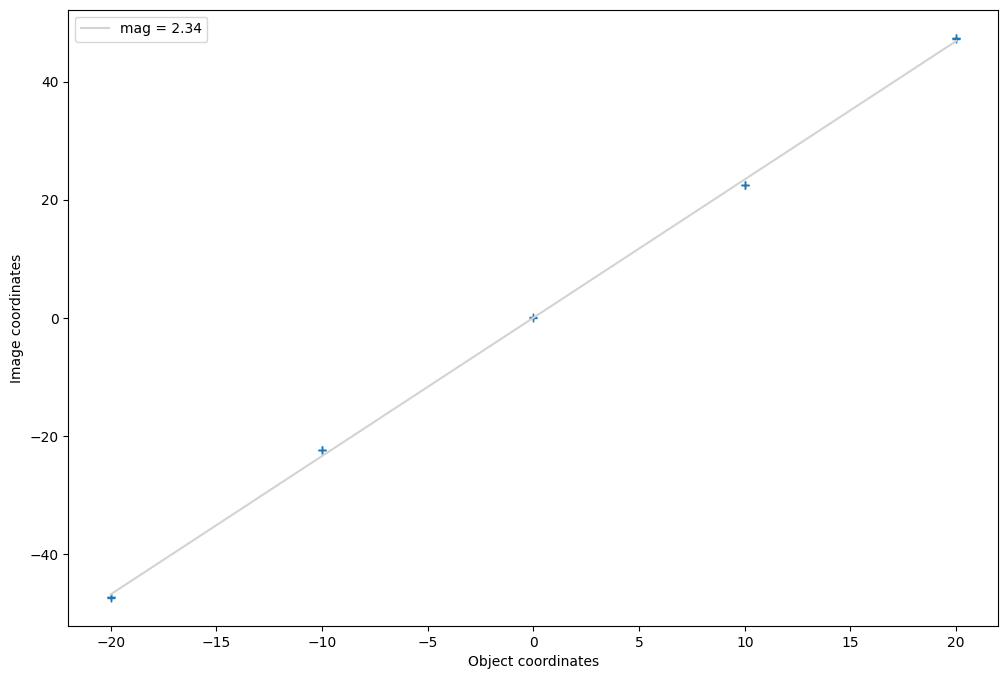

In [2]:
import torch
import torchlensmaker as tlm
import torch.optim as optim

# Setup two spherical surfaces with initial radiuses
shape1 = tlm.CircularArc(height=30, r=tlm.Parameter(torch.tensor(25.)))
shape2 = tlm.CircularArc(height=30, r=tlm.Parameter(torch.tensor(65.)))

lens = tlm.AsymmetricLens(shape1, shape2, (1.0, 1.5), outer_thickness=3.)

# Build the optical sequence
optics = tlm.OpticalSequence(
    tlm.ObjectAtInfinity(beam_diameter=40, angular_size=40),
    tlm.Gap(15),
    lens,
    tlm.Gap(20),
    tlm.Aperture(height=50, diameter=10),
    tlm.Gap(100),
    tlm.ImagePlane(height=100),
)

# Render the optical configuration with initial values
# Sample 10 rays per location, and 5 object locations: total = 50 rays
tlm.render_plt(optics, color_dim="object", sampling={"rays": 10, "object": 5})
tlm.plot_magnification(optics, sampling={"rays": 10, "object": 5})

# Find the best parameters for the shapes
tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-4),
    sampling = {"rays": 10, "object": 10},
    num_iter = 200,
)

# Render with final values
tlm.render_plt(optics, sampling={"rays": 30, "object": 5}, color_dim="object")
tlm.plot_magnification(optics, sampling={"rays": 10, "object": 5})

In [3]:
from IPython.display import display
import build123d as bd

part = tlm.lens_to_part(lens)
display(part)

Part at 0x78bc285612e0, label(), #children(0)